<center><font size="6">FASHION MNIST: EASY WAY TO IMPLEMENT A CONVOLUTIONAL NEURAL NETWORK (CNN)</font></center>

<br>

<img src="https://raw.githubusercontent.com/OriolGilabertLopez/MachineLearning/master/Projects/MachineLearning/FashionMNIST/Auxiliars/Images/Clothes.JPG" width="900px">

# <a id='0'>Content</a>

- <a href='#1'>1. INTRODUCCIÓN</a>  
- <a href='#2'>2. IMPORTACIÓN DE DATOS</a>  
- <a href='#3'>3. CONJUNTO DE DATOS</a>  
    - <a href='#3.1'>3.1. Categorias de los datos</a>
    - <a href='#3.2'>3.2. ¿Cómo son las imágenes?</a>
- <a href='#4'>4. QUICK VIEW DE LOS DATOS</a>  
    - <a href='#4.1'>4.1. Distribución por clases</a>
    - <a href='#4.2'>4.2. Visualizando la matriz como imágenes</a>
        - <a href='#4.2.1'>4.2.1. Muestra train</a>
        - <a href='#4.2.2'>4.2.1. Muestra test</a>
- <a href='#5'>5. PREPROCESAMIENTO DE LOS DATOS</a>  
    - <a href='#5.1'>5.1. Feature Engineering</a>
    - <a href='#5.2'>5.2. Split del datset train para el entrenamiento del modelo</a>
- <a href='#6'>6. MODELO</a>  
    - <a href='#6.1'>6.1. Partes del Modelo</a>
        - <a href='#6.1.1'>6.1.1. Modelo Parte 1</a>
        - <a href='#6.1.2'>6.1.2. Modelo Parte 2</a>
        - <a href='#6.1.3'>6.1.3. Modelo Parte 3</a>
    - <a href='#6.2'>6.2. Evaluación del modelo</a>
    - <a href='#6.3'>6.3. Predicciones en base al modelo</a>
    - <a href='#6.4'>6.4. Matriz de Confusión: Evaluación de las Predicciones</a>
- <a href='#7'>7. CONCLUSIONES</a>  
- <a href='#8'>8. REFERENCIAS</a>  

<a id="1"></a>
# 1. INTRODUCCIÓN

Actualmente, la clasificación de cualquier objeto por imagen es una realidad gracias el Machine Learning. Una herramienta tan potente como ésta ha dado vida a abrir nuevas investigaciones en el mundo de la estadística, biología y cualquier rama que use las ciencias computacionales. 

¡Vamos!

<br>

__¿Qué encontraras en este notebook?__
 * __Análisis Descriptivo:__ Estudiaremos con una descriptiva básica los datos. Hay que conocerlos antes de actuar
 * __Selección del Modelo:__ Seleccionaremos una __R__ed __N__ueronal __C__onvolucional  como modelo para la clasificación de las imágenes
 * __Construcción del Modelo:__ Estudiaremos el overfitting para que el modelo generalice las predicciones (no sólo lo haga para sus datos de entrenamiento). Se pondrán caps de regularización, filtros, se aplicara reducción de la dimensionalidad... 
 * __Selección del Algortimo de Optimización:__ Seleccionaremos un algoritmo adecuado para la optimización del modelo en cuanto a su convergencia que, según pruebas realizadas en algunos estudios, marcan la diferencia entre los buenos resultados y los malos. En nuestro caso, creemos adecuado aplicar el algoritmo de optimización __Adam__, una extensión del algoritmo Stochastic Gradiente Descent (SGD)
 * __Valoracón del Modelo:__ Valoraremos la __precisión/accuracy__ y la __pérdida/loss__ del conjuntos de datos de validación. 
 * __Predicciones:__ Haremos las predicciones con los datos test
 * __Valoración de las Predicciones:__ Sacaremos una matriz de confusion para evaluar la calidad de las predicciones

<a id="2"></a>
# 2. IMPORTACIÓN DE DATOS

El primer paso que debemos realizar es importar los datos, visualizarlos y tener una idea general de como son y como se distribuyen. Nuestra ruta para importar las imágenes es la siguiente: _`/kaggle/input/fashionmnist/...`_

Para ello, debemos cargar antes los datos al notebook (`+ Add data`) y seguidamente leemos los paths con la ayuda de la libreria `import pandas`. El código es el siguiente: 

In [1]:
import pandas as pd

trainData = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')       
testData = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')  

<a id="3"></a>
# 3. CONJUNTO DE DATOS

<br>
    
Nuestro conjunto de datos esta formado por 70.000 imágenes, el cual está dividido en dos subconjuntos:  __train__ y __test__. Los conjuntos de datos tienen las siguientes características:
 * __Train:__ Se utilizará para entrenar el modelo. Este set contiene el 85% de todas las imagenes, es decir, un total de 60.000 imágenes donde cada una esta formada por 784 píxeles.
 * __Test:__ Se utilizará para probar el modelo. Este set contiene el 15% de todas las imagenes, es decir, un total de 10.000 imágenes donde cada una esta formada por 784 píxeles.
<br>


## 3.1. Categorias de los datos

 |   Índice    |        Categoria          |
 |-------------|---------------------------|
 |      0      |      Camiseta / top       |    
 |      1      |        Pantalón           |
 |      2      |         Jersey            |
 |      3      |        Vestido            |
 |      4      |        Abrigo             |
 |      5      |       Sandalia            |
 |      6      |        Camisa             |
 |      7      |  Zapatilla de deporte     |
 |      8      |        Bolsa              |
 |      9      |        Botín              |


<br>

<a id="3.2"></a>
## 3.2. ¿Cómo son las imágenes? 

Cada imagen es una matriz cuadrada I$_{i}$ $\in$ M$_{m,n}$ dónde m,n = 28 píxeles. Cada uno de los píxeles que describen la matriz representa el brillo (o color) de dicho píxel. En el caso más sencillo de imágenes binarias, el valor del píxel es un número de un bit que indica el primer plano o el fondo del imagen. Un ejemplo sencillo es el símbolo del _Yin y el  Yang_. Pero nosotros estamos en una situación diferente, donde cada imagen tiene tonalidades diferentes ya que estamos en un caso donde el color es una escala de grises. 
<br>

En este caso, estamos en un formato de imagen tipo byte (el número se almacena como un entero de 8 bits, es decir, un byte) lo que nos da un rango de posibles valores que fluctúan entre 0 y 255 donde, normalmente, 255 es el blanco y 0 el negro.

<br>
<a id="3.3"></a>

## 3.3. ¿Se puede utilizar Deep Learning para este conjunt de datos? 
En este escenario, tenemos que cada imagen tiene un total de 785 píxeles (28x28), es decir, tenemos un total aproximado de 55 millones de valores para todo el conjunto de datos, por lo tanto, es una cifra aceptable para un proyecto de DL


<a id="4"></a>
# 4. QUICK VIEW DE LOS DATOS

<br>
Lo primero que debemos hacer es visualizar las dimensión del dataset:

In [2]:
print('\t Filas,  Columnas', )
print('Train:\t', trainData.shape)
print('Test:\t', testData.shape)

	 Filas,  Columnas
Train:	 (60000, 785)
Test:	 (10000, 785)


Seguidamente, debemos comprobar si existen datos faltantes:

In [26]:
def cehck_nulls(data):
    if data.isnull().any().any() == False:
        return print('los datos NO conetienen valores Null')
    else:
        return print('los datos SI conetienen valores Null')

cehck_nulls(trainData)
cehck_nulls(testData)

los datos NO conetienen valores Null
los datos NO conetienen valores Null


<a id="4.1"></a>
## 4.1. Distribución por clases


No menos importante es visualizar la matriz de datos, pues nos es imprescindible para manejarlos y saber con cual de las columnas asociar las etiquetas. Para ello, mostramos las 3 primeras y últimas filas del data set Train (idem por el test):

In [4]:
trainData.head(4).append(trainData.tail(3))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Como podemos observar, la primera columna `label` (no confindir con el índice) es la que nos referencia que tipo de prenda es, por ejemplo, la primera fila el valor de `label` es 2, por lo que nosotros podemos afirmar que ese conjunto de píxeles conforman la prenda __jersey__. Crearemos una nueva columna llamada `labelName` (qualitativa) que será la transcripcion de `label` (quantitativa):


In [5]:
labels = {  0: "Camiseta / Top",
            1: "Pantalón",
            2: "Jersey",
            3: "Vestido",
            4: "Abrigo",
            5: "Sandalia",
            6: "Camisa",
            7: "Zapatilla de deporte",
            8: "Bolsa",
            9: "Botines"
         }

n_cat = len(labels)

def add_column_from_dict(data, col, new_col, dict_):
    data[new_col] = data[col].map(dict_)
    return data

add_column_from_dict(trainData, 'label', 'labelName', labels)
add_column_from_dict(testData, 'label', 'labelName', labels)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,labelName
0,0,0,0,0,0,0,0,0,9,8,...,87,56,0,0,0,0,0,0,0,Camiseta / Top
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pantalón
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,63,53,31,0,0,0,Jersey
3,2,0,0,0,0,0,0,0,0,0,...,126,140,0,133,224,222,56,0,0,Jersey
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vestido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,23,14,20,0,0,1,0,0,0,Camiseta / Top
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,Camisa
9997,8,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,Bolsa
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Bolsa


Segidamente, crearemos una función llamada `pie_plot()` que nos graficará la distribución de prendas de ropa según el conjuto de datos introducidos:

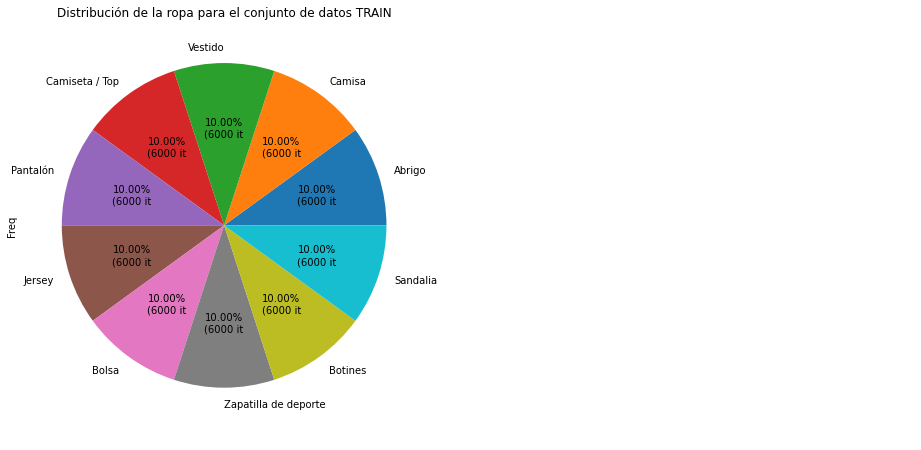

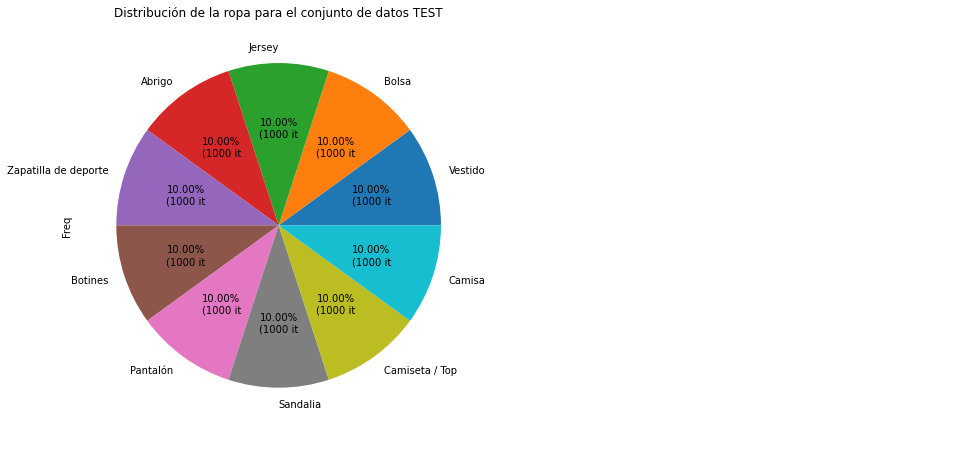

In [6]:
import matplotlib.pyplot as plt

def pie_plot(data, plotTitle):
    
    aux = data['labelName'].value_counts().to_frame('Freq')
    aux['labelName'] = aux.index 
    valores = aux['Freq']
    
    def pct_abs(values):
        def funct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%\n({v:d} it'.format(p = pct,v = val)
        return funct


    plt.figure(figsize = (16,8))

    ax1 = plt.subplot(121, aspect = 'equal')
    aux.plot(kind = 'pie', 
             y = 'Freq', 
             ax = ax1,
             autopct = pct_abs(valores), 
             labels = aux['labelName'], 
             legend = False,
             title = plotTitle,
             fontsize = 10)

    # plot table
    ax2 = plt.subplot(122)
    plt.axis('off')
    plt.show()
    
    
plot1 = pie_plot(trainData,'Distribución de la ropa para el conjunto de datos TRAIN')
plot2 = pie_plot(testData, 'Distribución de la ropa para el conjunto de datos TEST')
plt.show()

Observamos que cada prenda de ropa se distribuye por igal para cada uno de los conjuntos de datos (10 calses donde cada clase representa un 10% del total).

<a id="4.2"></a>
## 4.2. Visualizando la matriz como imágenes

<br>

Procedemos a cear una función que nos graficará la prenda seleccionadndo una fila de la matriz (1 fila = 1 prenda). Para ello, redimensionamos la fila de píxeles (una fila = una imagen, es decir, un vector $V = (v_1, v_2, ..., v_n)$ donde $n$ = 784 ) a una matriz de I $\in$ M$_{m,n}$, donde $m, n = 28$.


In [7]:
import numpy as np

def plot_image_sample(data, label_number, DataSetType, pf, pc):
    
    type_data = ('TRAIN' if DataSetType.lower().find("train") == label_number else 'TEST')
    
    # Obtenemos la etiqueta (diccionario)
    etiqueta = labels[label_number]
    # Eliminamos la primera columna (codigo etiqueta) y la última (nombre etiqueta)
    aux = data[data["label"] == label_number].sample(1)
    aux2 = aux.iloc[:, 1:-1]
    img = np.array(aux2).reshape(pf, pc)

    plt.imshow(img, cmap = 'gray')
    plt.grid(True)
    plot = plt.title('Ropa: ' + str(etiqueta) + '\nDatos: ' + str(type_data))
    

def matrix_image_sample(data, label_number, pf ,pc):
    
    pd.options.display.max_columns = None
    aux = data[data["label"] == label_number].sample(1)
    aux2 = aux.iloc[:, 1:-1]
    img = pd.DataFrame(np.array(aux2).reshape(pf, pc))

    return img 

<a id="4.2.1"></a>
## 4.2.1. Muestra train

Como ya hemos hablado antes, mostramos la imagen con una dimension de 28x28. Para ello, definimos dos parametros _**pf**_ y _**pc**_:

   * **pf** $\rightarrow$ 28 ( _píxeles fila_ )
   * **pc** $\rightarrow$ 28 ( _píxeles columna_ )
 
Procedemos a visualizar para una prenda de ropa su matrix de datos y su apariencia real: 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,3,0,0,1,1,0,4,2,14,8,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,195,203,103,108,110,95,134,204,89,24,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,223,241,245,245,245,246,247,248,247,255,200,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,6,0,75,239,219,230,226,217,216,222,231,229,241,180,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,2,0,179,237,222,233,231,227,228,226,240,233,250,183,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,233,226,223,230,229,225,226,226,236,226,251,164,0,0,0
7,0,0,0,0,0,0,0,0,0,0,5,0,17,255,225,230,233,230,225,226,226,239,228,250,188,0,0,0
8,0,0,0,0,0,0,0,0,0,0,2,0,79,237,222,231,234,226,223,224,227,241,240,245,255,0,0,0
9,0,0,0,0,0,0,0,0,0,0,6,0,158,239,216,229,231,225,224,224,227,240,240,238,252,73,0,0


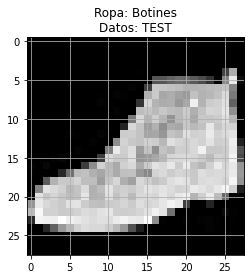

In [8]:
pf = 28
pc = 28

plot_image_sample(trainData, 9, 'train', pf, pc)
matrix_image_sample(trainData, 9, pf, pc)

<a id="4.2.2"></a>
## 4.2.2. Muestra test


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,2,0,4,52,92,124,73,56,105,147,148,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,4,0,42,210,183,255,255,91,255,212,217,197,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,4,0,23,243,236,140,193,16,255,133,209,243,5,0,3,0,0,0,0,0,0
3,0,0,0,0,0,0,0,4,0,0,169,245,197,209,255,235,216,226,213,19,0,4,0,0,0,0,0,0
4,0,0,0,0,0,0,0,3,0,5,206,245,226,6,243,238,250,92,57,8,0,2,0,0,0,0,0,0
5,0,0,0,0,0,0,0,3,0,1,122,242,247,95,26,214,254,80,67,12,0,2,0,0,0,0,0,0
6,0,0,0,0,0,0,0,4,0,23,153,234,32,2,0,101,251,184,84,12,0,2,0,0,0,0,0,0
7,0,0,0,0,0,0,0,5,0,29,246,236,206,113,97,193,255,150,92,16,0,3,0,0,0,0,0,0
8,0,0,0,0,0,0,0,7,0,41,243,236,242,248,168,255,223,188,236,15,0,4,0,0,0,0,0,0
9,0,0,0,0,0,0,0,4,0,49,255,11,239,225,56,255,85,124,253,0,0,4,0,0,0,0,0,0


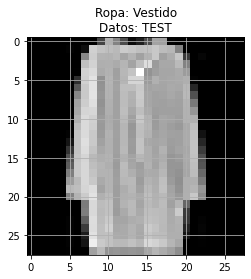

In [9]:
plot_image_sample(testData, 3, 'Test', pf, pc)
matrix_image_sample(testData, 3, pf, pc)

<a id="5"></a>
# 5. PREPROCESAMIENTO DE LOS DATOS

<a id="5.1"></a>

## 5.1. Feature Engineering

<br>

La __feature engineering__ es simplemente un proceso ed exploracion de datos, por ejemplo, saber si nuestros datos se deben __escalar__, __estandarizar__, __normalizar__ o __transformar__ (algunas redundantes). 
<br>

Realmente, para la __feature engineering__ no existe una regla fácil o común que debamos utilizar, pero con experiencia, se puede llegar a ciertas conclusiones. Por ejemplo, se sabe que dividir por 255 una matriz de datos cuando ésta representa valores asociados a escalas de grises (de 0 a 255), produce una mejora en la convergencia de algunas funciones como puede ser la sigmoide, la cual trabaja con valores $x \in$ $[0, 1]$. Además, esto puede causar una explosión del gradiente (no entraremos ahora en esto). Sin afirmar nada pero como regla general, yo escalaria los datos primero y luego entrenaria el modelo.
<br>

Por otro lado, si los datos están normalizados o centrados en cero, los valores de los píxeles son pequeños (aún siendo valores pequeños, estos no pierden la representatividad de la imagen original) y, por lo tanto, el cálculo requerido y el tiempo para la convergencia del modelo se reducen significativamente. 


Pensad que durante la __forward propagation__ (propagación hacia adelante), se realizan productos sobre los valores de los píxeles con la matriz de peso para esa capa en particular. Ahora, multiplicar esos grandes valores de píxeles requiere muchos recursos computacionales y de tiempo. Y, por lo tanto, el modelo converge muy lentamente.




In [10]:
import keras

def preprocesamiento(data, pf, pc):
    
    out_Y = keras.utils.to_categorical(data.label, len(labels))
    x_vect = data.values[:,1:-1]  #transformamos el dataFrame en un ndarray, seleccionando solo los píxeles
    x_scaled = x_vect / 255 # Dividimos por 255 por literatura (convergencia del gradiente, evita le colapso)
    n_img = data.shape[0]
    out_X = x_scaled.reshape(n_img, pf, pc, 1) # redimensionamos el vector a (1,784) a (28, 28, 1)  
    
    out_X = out_X.astype(float)
    out_Y = out_Y.astype(float)
    
    return out_X, out_Y

<u>__¿Qué es lo que hace ésta función?__</u>


Si somos un poco curosos, observamos que:

 1. Separamos la variable quantitativa `label` y la asociamos a la variable`out_Y`, la cual devolverá la _respuesta_. Destacar que la respuesta es ahora un vector, por ejemplo, si:
 
     * `label = 0` $\rightarrow$ `(1, 0, 0, 0, 0, 0, 0, 0, 0, 0)`
     * `label = 1` $\rightarrow$ `(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)`
     * $\vdots$              
     * `label = 9` $\rightarrow$ `(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)`
     
 2. Seleccionamos solo las columnas referente a los píxeles, es decir, quitamos las varibles referentes a las etiquetas (`label` y `labelName`). El resultado lo asociamos a la variable `x_vect`.
 3. Procedemos a realizar el reescalado de los datos, cogiendo todo el vector y dividiéndola por 255. El resultado lo asociamos a la variable `x_scaled`.
 4. Redimensionamos cada una de las imágenes a (28, 28, 1), el formato ideal para introducirlo al modelo





In [11]:
x_train, y_train = preprocesamiento(trainData, pf, pc)
x_test, y_test = preprocesamiento(testData, pf, pc)

<a id="5.2"></a>
## 5.2. Split del datset train para el entrenamiento del modelo



Normalmente lo que se hace es coger los datos train y dividir dicho set en dos, una parte para entrenar el modelo y otra parte para validarlo. Luego, se predice con los datos test original (no del train)

Es decir, del conjunto de datos total:


<img src="https://raw.githubusercontent.com/OriolGilabertLopez/MachineLearning/master/Projects/MachineLearning/FashionMNIST/Auxiliars/Images/FullData_Tran%26Val.png" width="400px">
<br>

Escogemos solo el set train (azul) y lo dividimos en 80% train y 20 test (o validación) de la siguiente manera:


<img src="https://raw.githubusercontent.com/OriolGilabertLopez/MachineLearning/master/Projects/MachineLearning/FashionMNIST/Auxiliars/Images/SplitTrain_with_Train%26Val.png" width="400px">


<br>

Existe una función en __sklearn__ que realiza dicho split del dataset automaticamente. Según la literatura (concretamente lo menciona __Aurélien Géron__ en el manual __Hand on machine learning with scikit-learn and tensorflow pdf__) el valor de la semilla (si se deseja fijar y mantener su reproducibilidad) se fija normalmente en el valor __42__.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

Unificamos el datatype del vector a un `float`

Ahora, por ejemplo, las distribución de las prendas de ropa es la siguiente:

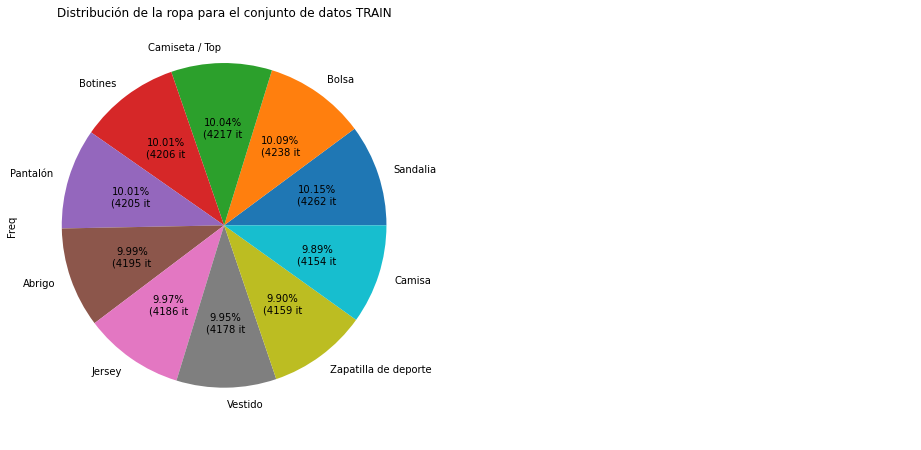

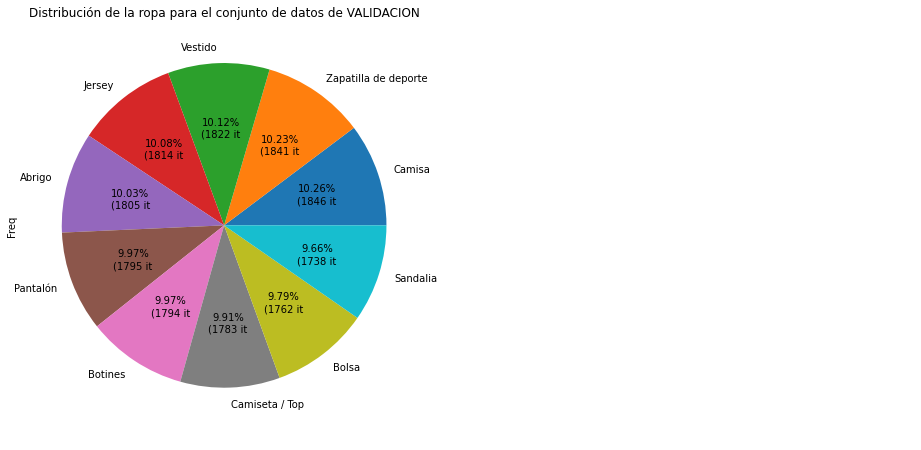

In [13]:
def proc_data_to_plot(data):

    freq = []
    for i in range(len(data)):
        freq.append(np.argmax(data[i]))
        
    return pd.DataFrame(freq, columns = ['Label'])
    
    
    
Train_labels_to_plot = proc_data_to_plot(Y_train) 
Val_labels_to_plot = proc_data_to_plot(Y_val) 

Train_labels_to_plot = add_column_from_dict(Train_labels_to_plot, 'Label', 'labelName', labels)
Val_labels_to_plot = add_column_from_dict(Val_labels_to_plot, 'Label', 'labelName', labels)


plot1 = pie_plot(Train_labels_to_plot,'Distribución de la ropa para el conjunto de datos TRAIN')
plot2 = pie_plot(Val_labels_to_plot, 'Distribución de la ropa para el conjunto de datos de VALIDACION')
plt.show()

<a id="6"></a>
# 6. MODELO


En python exisen varias maneras de implementar un modelo, en nuestro caso, usearemos el __secuencial__ (`model = Sequential()`). Este funciona añadiendo capas de código como se puede observar en el sigueinte chunk.


<a href='#6.1'>6.1. Partes del Modelo</a>
## 6.1 Partes del Modelo

<a id="6.1.1"></a>
### 6.1.1 Modelo Parte 1
    
* __LeakyReLU__:  Definimos la funcion __LeakyReLU__ como funcion de activación. Esta función es más eficaz que la ReLU comunmente conocida.  
* __Capa convolucional 2D (Conv2D)__:
    * __Filtros__: Numero de filtros (kernels) utilizados en esta capa son 32
    * __kernel_size__: Dimmensión del Kernel: (3 x 3)
    * __activation__: Utilitzamos la función `LeakyReLU`
    * __kernel_initializer__: Función utilizada para inicializarel kernel: `he_normal`. Solo se utiliza en la primera capa. Esta [funcion](http://man.hubwiz.com/docset/TensorFlow.docset/Contents/Resources/Documents/api_docs/python/tf/keras/initializers/he_normal.html) se basa en muestras de una distribución normal truncada centrada en $0$ con $sd = \sqrt(\frac{2}{fan_{in}})$ donde $fan_{in}$ es el número de unidades de entrada en el tensor ("vector").
    * __input_shape__: Dimensión de la imagen presentada a la CNN: en nuestro caso es una imagen de 28 x 28. La entrada y salida del Conv2D es un tensor 4D.
* __MaxPooling2D__: La capa de reducción o pooling se coloca generalmente después de la capa convolucional. La función principal radica en la reducción de las dimensiones (anchura y altura) de entrada para la siguiente capa convolucional. Esto está muy bien, pero la reducción del volumen de datos conlleva intrínsecamente la pérdida de información, sin embargo, la reducción de la información puede ser algo baneficiós para la red por tres razones:
    
     * Reduce la sobrecarga de cálculos para las próximas capas de la red 
     * Reduce el overfitting (o el sobreajustmanet)
     * Favorece una computación ligera
  
  Sin alargarme más, en nuestro caso aplicamos un reduccion de (2, 2), reducimos 2 en $y$ y 2 en $x$
         
* __Dropout__: En redes neuronales profundas, tener una gran cantidad de parámetros hace que el overfitting tome un rol importante en las predicciones. El overfitting es un problema frecuente que requiere de técnicas para su regulación. Así pues, la técnica de regularización más popular para redes neuronales profundas es, sin duda, el __dropout__. La idea clave es que, en cada uno de los pasos del entrenamiento, desactive aleatoriamente neuronas (incluyendo las neuronas de entrada, pero excluyendo las neuronas de salida). Concretamente, cada neurona está determinada por una probabilidad $p$ de ser temporalmente abandonadas, lo que se llama en inglés neuronas en estado _dropped-out_. Esto significa que, las neuronas que pertenezcan en este estado serán totalmente ignoradas durante el entrenamiento. El hiperparamèmetre $p$ se denomina __tasa de abandono__ o __dropout rate__ y normalmente se sitúa en el 50%, es decir, $p$ = 0.5. Este valor $p$ es totalmente fluctuable y no se rigue por reglas concretas. 

  Pues en nuestro caso fijaremos este parametro en $p$ = 0.3

_Code:_

`model = Sequential()
LeakyReLU = lambda x: tf.keras.activations.relu(x, alpha=0.1)
model.add(Conv2D(32, 
                 kernel_size = (3, 3),
                 activation = LeakyReLU,
                 padding="same",
                 input_shape=(pf, pc, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3)`

                  



<a id="6.1.2"></a>
### 6.1.2 Modelo Parte 2
    

  
* __Capa convolucional 2D__:
    * __Filtros__: 64
    * __kernel_size__: (3 x 3)
    * __activation__: Utilitzamos la función `LeakyReLU`
    * __input_shape__: 28 x 28
* __MaxPooling2D__: (2, 2)
* __Dropout__: 0.5

_Code:_

`model.add(Conv2D(64, 
                  kernel_size = (3, 3),
                  activation = LeakyReLU,
                  input_shape=(pf, pc, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))`





<a id="6.1.3"></a>
### 6.1.3 Modelo Parte 3
    


* __Capa convolucional 2D__:
    * __Filtros__: 128
    * __kernel_size__: (3 x 3)
    * __activation__: Utilitzamos la función `LeakyReLU`
* __Flatten__: Esta capa aplana la entrada y Se usa sin parametros 
* __Dense__:
    * __unidades__: 128 (debe ser positivo)
    * __activation__: Utilitzamos la función `LeakyReLU`
.
* __Dropout__: 0.3
* __Dense - Fully Connected__: Esta es la capa final (completamente conectada). 
    * __unidades__: Numero de categorias a predecir, en nuestro caso, 10.
    * __activation__: `softmax` (estándar para la clasificación multiclase)
    


_Code:_

`model.add(Conv2D(128, (3, 3), activation = LeakyReLU))
model.add(Flatten())                               
model.add(Dense(128, activation = LeakyReLU))
model.add(Dropout(0.3))
model.add(Dense(n_cat, activation = 'softmax'))`               


In [14]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D



#Parte 1 del modelo
model = Sequential()

LeakyReLU = lambda x: tf.keras.activations.relu(x, alpha=0.1)
model.add(Conv2D(32, 
                 kernel_size = (3, 3),
                 activation = LeakyReLU,
                 padding="same",
                 input_shape=(pf, pc, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


#Parte 2 del modelo
model.add(Conv2D(64, 
                 kernel_size = (3, 3), 
                 activation = LeakyReLU,
                 padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))


#Parte 3 del modelo
model.add(Conv2D(128, (3, 3), activation = LeakyReLU))
model.add(Flatten())                               # Flatemos el tensor de pixeles:
model.add(Dense(128, activation = LeakyReLU))
model.add(Dropout(0.3))
model.add(Dense(n_cat, activation = 'softmax'))    # La ultima capa debe ser el nº de lables a predecir



Ahora que hemos definido como sera la red neuronal ahora, debemos elegir la __función de coste__, un __optimizador__ y las __métricas de rendimiento__, es decir, la __compilación__ del modelo.

En nuestero caso eligiremos lo siguiente:

* __FUNCIÓN DE COSTE__ --> `categorical_crossentrop`: Para un problema de clasificación como el nestro que tiene 10 clases posibles etiquetas, necesitamos usar la función de pérdida llamada `categórica_crossentropy`. 
* __OPTIMIZADOR__ --> `adam`: Una de las partes más importantes del modelo es la elección del método de optimización. La elección del algoritmo de optimització23 marca la diferencia entre buenas y malas predicciones. En nuestro caso, hemos seleccionado el algoritmo de optimización [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) (existen otros como  el stochastic gradiente descent (SGD), Mini-batch gradiente descent (MBGD), ...), el cual es extensión del SGD. Adam, según los autorses, es computacionalmente eficiente, necesita pocos requisitos de memoria y, además, es adecuado para grandes cantidades de datos.

* __MÉTRICA DE RENDIMIENTO__ --> `Accuracy`. Nos ayudará a validar el modelo 

In [15]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         7

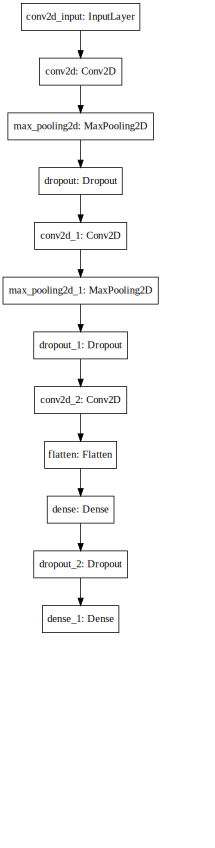

In [17]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG


SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
batch = 70
epocas = 50
 
train_model = model.fit(X_train, Y_train,
                  batch_size = batch,
                  epochs = epocas,
                  verbose = 1,
                  validation_data=(X_val, Y_val))

Epoch 1/50
600/600 [==============================] - 4s 6ms/step - loss: 0.6060 - accuracy: 0.7755 - val_loss: 0.3632 - val_accuracy: 0.8689
Epoch 2/50
600/600 [==============================] - 3s 5ms/step - loss: 0.3859 - accuracy: 0.8571 - val_loss: 0.3079 - val_accuracy: 0.8881
Epoch 3/50
600/600 [==============================] - 3s 6ms/step - loss: 0.3378 - accuracy: 0.8769 - val_loss: 0.2916 - val_accuracy: 0.8932
Epoch 4/50
600/600 [==============================] - 3s 6ms/step - loss: 0.3076 - accuracy: 0.8878 - val_loss: 0.2680 - val_accuracy: 0.9026
Epoch 5/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2901 - accuracy: 0.8923 - val_loss: 0.2513 - val_accuracy: 0.9087
Epoch 6/50
600/600 [==============================] - 3s 6ms/step - loss: 0.2768 - accuracy: 0.8968 - val_loss: 0.2723 - val_accuracy: 0.8993
Epoch 7/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2630 - accuracy: 0.9016 - val_loss: 0.2382 - val_accuracy: 0.9150
Epoch 

<a id="6.2"></a>
## 6.2 Evaluación del modelo



In [19]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Perdida/Loss Test:', score[0])
print('Precision/Accuracy Test:', score[1])

Perdida/Loss Test: 0.21299885213375092
Precision/Accuracy Test: 0.9296000003814697


In [20]:
import plotly.graph_objs as go

def interpolation_tracer(x, y, text, mode):
    fig.add_trace(go.Scatter(x = x, 
                             y = y, 
                             name = text,
                             mode = mode))
    fig.update_yaxes(range=[0,1])
    fig.update_xaxes(title_text = 'Épocas')
    fig.update_yaxes(title_text = 'Loss & Accuracy')
    
def layout_plot(Titulo):
    fig.update_layout(title = {'text': Titulo},
                      xaxis_title = "Accuracy",
                      yaxis_title = "Épocas",
                      legend_title = "Leyenda",
                      font = dict(family = "Courier New, monospace",
                                  size = 18,
                                  color = "RebeccaPurple"))
hist = train_model.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1, len(acc) + 1))
    
fig = go.Figure()
interpolation_tracer(epochs, acc, 'Training accuracy', 'lines+markers')
interpolation_tracer(epochs, val_acc, 'Validation accuracy', 'lines+markers')
layout_plot('<b>Accuracy</b> entrenamiento y validación')
fig.show()

fig = go.Figure()
interpolation_tracer(epochs,loss,'Training loss', 'lines+markers')
interpolation_tracer(epochs,val_loss,'Validation loss', 'lines+markers')
layout_plot('<b>Loss</b> entrenamiento y validación')
fig.show()



Al entrenar un modelo de machine learning, una de las principales cosas que desea evitar sería el overfitting (sobreajuste). 
El overfitting _aparece_ cuando el __modelo se ajusta bien a los datos de entrenamiento, pero no puede generalizar y hacer predicciones precisas de datos que no ha visto antes__. 


Las métricas del conjunto de entrenamiento nos permitem ver cómo progresa nuestro modelo en términos del entrenamiento, pero son las métricas del conjunto de validación las que nos permitiran obtener una medida de la calidad del modelo: qué tan bien es capaz de hacer nuevas predicciones basadas en datos que no ha visto antes.


Un gráfico de curvas de aprendizaje muestra sobreajuste si:
* El evolutivo de la __training loss__ continúa disminuyendo con la experiencia.
* El evolutivo de la __training loss__ disminuye hasta llegar a un punto de inflexión y comienza a aumentar nuevamente.


El punto de inflexión en la pérdida de validación puede ser el punto en el que el entrenamiento podría detenerse ya que la experiencia después de ese punto muestra la dinámica del overfitting.

Como nos podemos imagniar, un buen ajuste es el objetivo de nuestro modelo. Un buen ajuste se identifica por una pérdida de entrenamiento y validación que disminuye hasta llegar a un punto de estabilidad con una brecha mínima entre los dos valores de pérdida final.

La pérdida del modelo casi siempre será menor en el conjunto de datos de entrenamiento que en el conjunto de datos de validación. Esto significa que debemos esperar cierta brecha entre ambas curvas, esta brecha se conoce como la __brecha de generalización__.

Sabiendo todo esto, podemos decir que nuestro modelo en general no presneta overfitting (o muy poquito) y, por este motivo, nuestras curvas de aprendizaje nos dan a entender que nuestro modelo tiene un buen ajuste. En otras palabas:

* El evolutivo de la __training loss__ disminuye hasta llegar a un punto de estabilidad.
* El evolutivo de la __training loss__ disminuye hasta llegar a un punto de estabilidad y presentna una pequeña brecha respecto la __training loss__.

__NOTA:__ El entrenamiento continuo de un buen ajuste probablemente conducirá a un sobreajuste.


<a id="6.3"></a>

## 6.3 Predicciones en base al modelo

Ahora viene lo divertido, probar el modelo! Para ello, antens nos hemos reservado en conjunto de datos test. Con la función `predict_classes()` llevaremos a cabo esta tarea.

Vamos a realizar las predicciones:

In [21]:
pred = model.predict_classes(x_test)

paro... realmente que es lo que deberia haber predicho?. Para saber que es lo que deberia haber predicho sacamos las etiquetas reales del conjunto de entrenamiento:

In [22]:
y_true = testData.iloc[:,0].to_numpy()

Comparamos las etiquetas predecidas con las reales (`pred[:10000] == y_true[:10000]`). Luego, sacamos aquellas que hayan hecho match, es decir, que has sido predecidas correctamente (` == True`). Con la función `np.where()` sacamos el valor de indice (posición) de la etiqueta para saber a que número se refiere y, finalmente, con `[0]` convertimos el resultado de `tupla` a `numpy.ndarray`.   

In [23]:
n = len(pred[:10000])

GoodPred = np.where((pred[:10000] == y_true[:10000]) == True)[0]
BadPred  = np.where((pred[:10000] == y_true[:10000]) == False)[0]

print('Se han predicho correctamente ' + str(GoodPred.shape[0]) + 
      ' clases de ' + str(n) + '.\tAcc: ' + str(round((GoodPred.shape[0]/n)*100, 2)) + '%')

print('Se han predicho erróneamente ' + str(BadPred.shape[0]) +
      ' clases de ' + str(n) + '.\tAcc: ' + str(round((BadPred.shape[0]/n)*100, 2)) + '%')

Se han predicho correctamente 9296 clases de 10000.	Acc: 92.96%
Se han predicho erróneamente 704 clases de 10000.	Acc: 7.04%


<a id="6.4"></a>

## 6.4 Matriz de Confusión: Evaluación de las Predicciones


Una buena herramienta para visualizar sobre que objetos hemos predicho mal, es la matriz de confusión (o clasificación). Esta matriz muestra como ha clasificado el modelo cada cinjunto de prendas. 

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

def Matriz_de_confusion(cm, clases,  normalize = False, title = 'Matriz de confusión', cmap = plt.cm.Oranges):
    
    plt.figure(figsize=(10 , 10) , dpi= 70)
    plt.imshow(cm , 
               interpolation = 'nearest' , 
               cmap = cmap ) 
    plt.suptitle(title, fontsize=20)
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, 
               clases,
               rotation = 45 )
    plt.yticks(tick_marks, 
               clases)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]) , range(cm.shape[1]) ):
        plt.text(j, i, format(cm[i, j] , fmt), 
        horizontalalignment = "center" ,
        color="white" if cm[ i, j] > thresh else "black" )
        
    plt.ylabel('Etiquetas reales')
    plt.xlabel('Etiquetas predichas') 

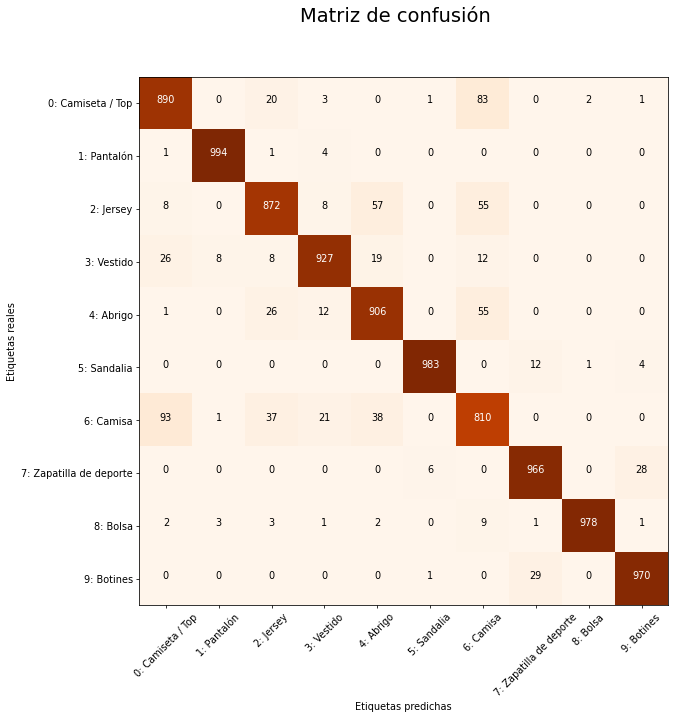

In [25]:
np.set_printoptions(precision = 2)
setLabels = [str(key) + str(': ') + labels[key] for key in labels]


Matriz_de_confusion(confusion_matrix(y_true, pred), 
                    clases = setLabels )

__INTERPRETACIÓN__:


__Ejes:__
* En el __eje _x___ tenemos las etiquetas (o prendas) que el modelo ha predicho 
* En el __eje _y___ tenemos las etiquetas (o prendas) reales del dataset test



__Valores:__
* Caso de la etiqueta __0: Camiseta/Top__: 

    1. El modelo ha predicho __890__ prendas de ropa como __Camiseta/Top__ que realmente eran __Camiseta/Top__
    2. El modelo __no ha predicho ningun Pantalón__. El modelo distingue bien entre __Pantalones__ y __Camiseta/Top__
    3. El modelo ha predicho __20__ prendas de ropa como __Jerseys__ cuando realmente eran __Camiseta/Top__
    4. El modelo ha predicho __3__ prendas de ropa como __Vestido__ cuando realmente eran __Camiseta/Top__
    5. Etcétera
    
    Así pues, nos fijamos que la diagonal representa el número de predicciones correctas y fuera de ella el número de predicciones erróneas. 


__Valores Marginales:__
* __Marginal de Y _(suma fila i-éssima)___: Número de etiquetas reales. 
    1. El número de etiquetas reales coinciden con el la suma de los marginales fila
    2. Ex: __9: Botines__: 1 + 29 + 970 = __1000__ prendas/etiquetas reales
    3. Etcétera
 
 
* __Marginal de X _(suma columna i-éssima)___:  Número de etiquetas predichas.
    1. La suma de una columa no tiene por que ser el igual al número de etiquetas reales para esa prenda, solo seria así si el modelo fuese 100% eficaz.
    2. Ex: __8: Bolsa__: 2 + 1 + 978 = __981__ Bolsas predichas, de las cuales  978 lo ha hecho satisfactoriamente.
    3. Etcétera

<a id="7"></a>
# 7. CONCLUSIONES

Para resolver este complejo problema, hemos aplicado técnicas del Deep Learning para la predicción de artículos de ropa con imágenes. Hemos observado que lesprediccions hechas han sido bastante buenas, con un total de __9237__ predicciones correctas respecto __763__ erróneas. 

Concluimos que no ha existido overfitting ya que hemos aplicado técnicas de reducción de la dimensionalidad (MaxPooling2D), capas de regularización (Dropouts), 50 epocas, un batch size de 70 (no se ha estudiado). 


Finalmente, con el modelo entrenado, hemos comprobado que predice bastante bien dentro lo que cabe para la resolución de las imágenes. Para confirmar que nuestro modelo puede generalizar, hemos introducido datos nuevos al modelo y este los ha predicho bien. 

Confirmamos que el modelo es bueno obteniendo una precisión de ~ 0.929 para los datos test.

<a id="8"></a>
# 8. REFERANCIAS

[1] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Editio, Aurélien GéroN. [https://www.oreilly.com](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

[2] How to use Learning Curves to Diagnose Machine Learning Model Performance, Jason Brownlee. [https://machinelearningmastery.com](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

[3] Activation Functions : Sigmoid, ReLU, Leaky ReLU and Softmax basics for Neural Networks and Deep Learning 
[https://medium.com](https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e)